In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import pickle
import sklearn.metrics

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




%matplotlib inline

In [2]:

# open adaption list from pickle file

with open('vote_df.pkl', 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [3]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [4]:
# precision
y2=df.iloc[:,0].map(lambda x: int(x=="democrat"))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y2, test_size=0.3, random_state=4444)

# Exercise 6.1 Accuracy scores for several models from ex5

## 6.1.1 KNN

In [6]:
knn = KNeighborsClassifier().fit(X_train,y_train)

In [7]:
# Scores
print "Accuracy:", accuracy_score(y_test,knn.predict(X_test))
print "Precision:", precision_score(y_test,knn.predict(X_test))
print "Recall:", recall_score(y_test,knn.predict(X_test))
print "F1:", f1_score(y_test,knn.predict(X_test))

Accuracy: 0.931297709924
Precision: 0.935897435897
Recall: 0.948051948052
F1: 0.941935483871


## 6.1.2 Log Reg

In [8]:
logreg=LogisticRegression().fit(X_train,y_train)

In [9]:
print "Accuracy:", accuracy_score(y_test,logreg.predict(X_test))
print "Precision:", precision_score(y_test,logreg.predict(X_test))
print "Recall:", recall_score(y_test,logreg.predict(X_test))
print "F1:", f1_score(y_test,logreg.predict(X_test))

Accuracy: 0.93893129771
Precision: 0.925925925926
Recall: 0.974025974026
F1: 0.949367088608


## 6.1.3 Gaussian

In [10]:
GNB=GaussianNB().fit(X_train,y_train)

In [11]:
print "Accuracy:", accuracy_score(y_test,GNB.predict(X_test))
print "Precision:", precision_score(y_test,GNB.predict(X_test))
print "Recall:", recall_score(y_test,GNB.predict(X_test))
print "F1:", f1_score(y_test,GNB.predict(X_test))

Accuracy: 0.954198473282
Precision: 0.938271604938
Recall: 0.987012987013
F1: 0.962025316456


## 6.1.4 SVC

In [12]:
sv=SVC().fit(X_train,y_train)

In [13]:
print "Accuracy:", accuracy_score(y_test,sv.predict(X_test))
print "Precision:", precision_score(y_test,sv.predict(X_test))
print "Recall:", recall_score(y_test,sv.predict(X_test))
print "F1:", f1_score(y_test,sv.predict(X_test))

Accuracy: 0.954198473282
Precision: 0.949367088608
Recall: 0.974025974026
F1: 0.961538461538


## 6.1.5 DTC

In [14]:
DTC=DecisionTreeClassifier().fit(X_train,y_train)

In [15]:
print "Accuracy:", accuracy_score(y_test,DTC.predict(X_test))
print "Precision:", precision_score(y_test,DTC.predict(X_test))
print "Recall:", recall_score(y_test,DTC.predict(X_test))
print "F1:", f1_score(y_test,DTC.predict(X_test))

Accuracy: 0.93893129771
Precision: 0.948051948052
Recall: 0.948051948052
F1: 0.948051948052


## 6.1.6 Random Forest

In [16]:
RFC=RandomForestClassifier().fit(X_train,y_train)

In [18]:
print "Accuracy:", accuracy_score(y_test,RFC.predict(X_test))
print "Precision:", precision_score(y_test,RFC.predict(X_test))
print "Recall:", recall_score(y_test,RFC.predict(X_test))
print "F1:", f1_score(y_test,RFC.predict(X_test))

Accuracy: 0.946564885496
Precision: 0.9375
Recall: 0.974025974026
F1: 0.955414012739


# Exercise 6.2 Curves

## 6.2.1 Precision Recall Curves

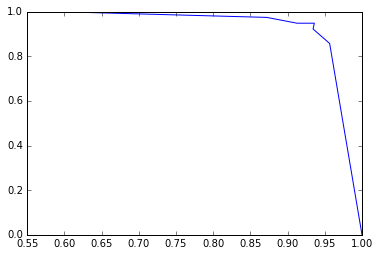

In [43]:
# Knn

precision, recall, thresholds = precision_recall_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(precision, recall)

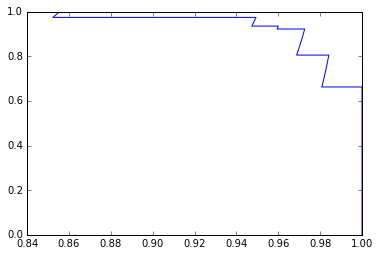

In [49]:
# Logreg

precision, recall, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(precision, recall)

## 6.2.2 ROC Curve

AUC: 0.949013949014


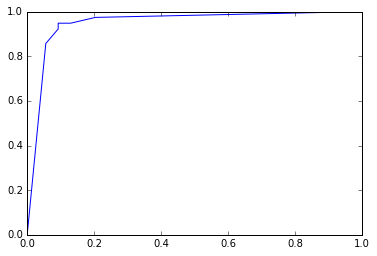

In [52]:
#knn

FPR, TPR, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(FPR, TPR)
print "AUC:", auc(FPR, TPR)

AUC: 0.983164983165


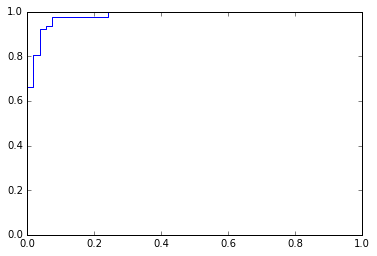

In [54]:
#logreg

FPR, TPR, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(FPR, TPR)
print "AUC:", auc(FPR, TPR)

# Exercise 6.3 

In [70]:

# open adaption list from pickle file

with open('cancer_df.pkl', 'rb') as picklefile: 
    cancer_df = pickle.load(picklefile)

In [72]:
cancer_df['Surv']=cancer_df['Surv'].map(lambda x: x-1)

In [73]:
LR3=LogisticRegression()
y=cancer_df.iloc[:,-1]
X = cancer_df.iloc[:,0:-1]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4444)

In [75]:
LR3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 6.3.1 Pecision Recall

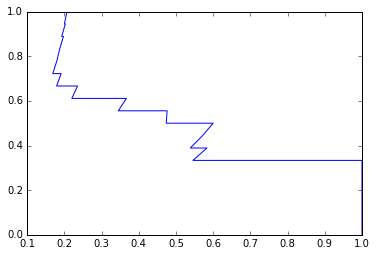

In [76]:
precision, recall, thresholds = precision_recall_curve(y_test, LR3.predict_proba(X_test)[:,1])
plt.plot(precision, recall)

## ROC AUC

AUC: 0.647522522523


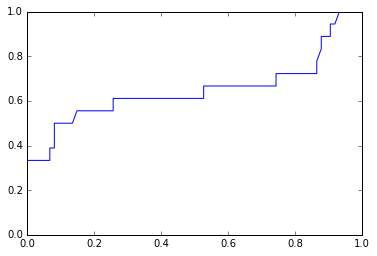

In [77]:
FPR, TPR, thresholds = roc_curve(y_test, LR3.predict_proba(X_test)[:,1])
plt.plot(FPR, TPR)
print "AUC:", auc(FPR, TPR)